Forest Fire is one of the destructive hazards that threatens lives and property altogether. Montesinho Natural Park, located in northeastern Portugal has experienced several of these forest fires in the 90's. Such forest fires if prediected can be life changing event for those associated with this natural park. The data used in this project is collected between January 2000 and December 2003 recorded 517 fire incidents within the park. And this project aims to predict forest fire in Montesinho Natural Park with minimum error.

This dataset contains the foolowing featrues,
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

<center><img src='The-map-of-the-Montesinho-natural-park_W640.jpg'></center>

Citation: Cortez, P., & Morais, A. (2007). Forest fires dataset [Data set]. UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/forest+fires

In [2]:
#necessary imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from PIL import Image

import calendar

In [3]:
df = pd.read_csv('forestfires.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


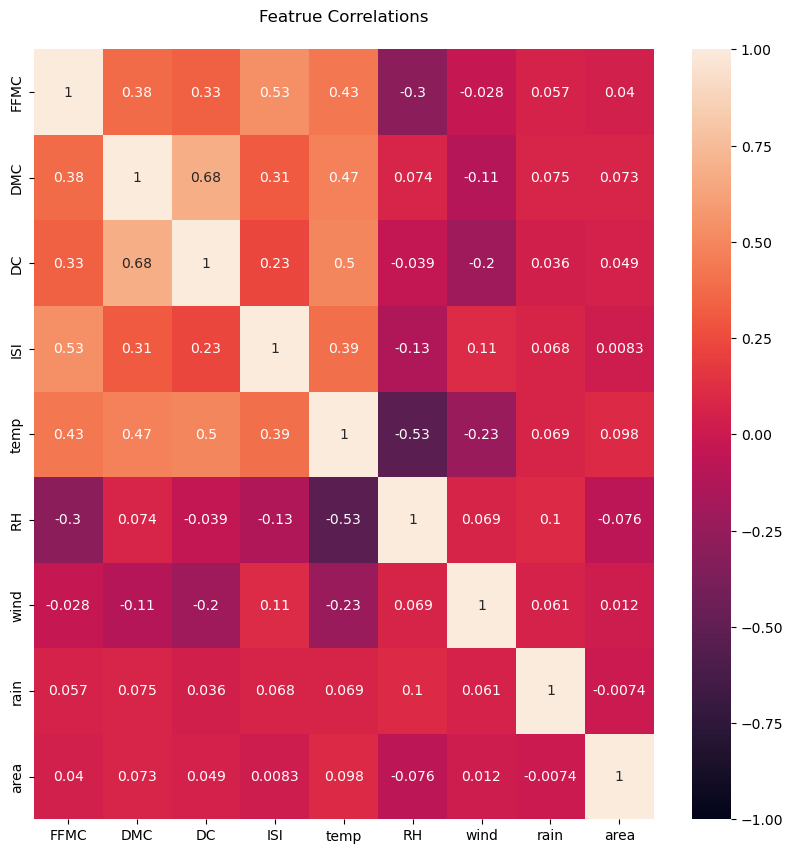

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,4:].corr(),annot=True,vmax=1,vmin=-1)
plt.title('Featrue Correlations',pad=20)
plt.show()

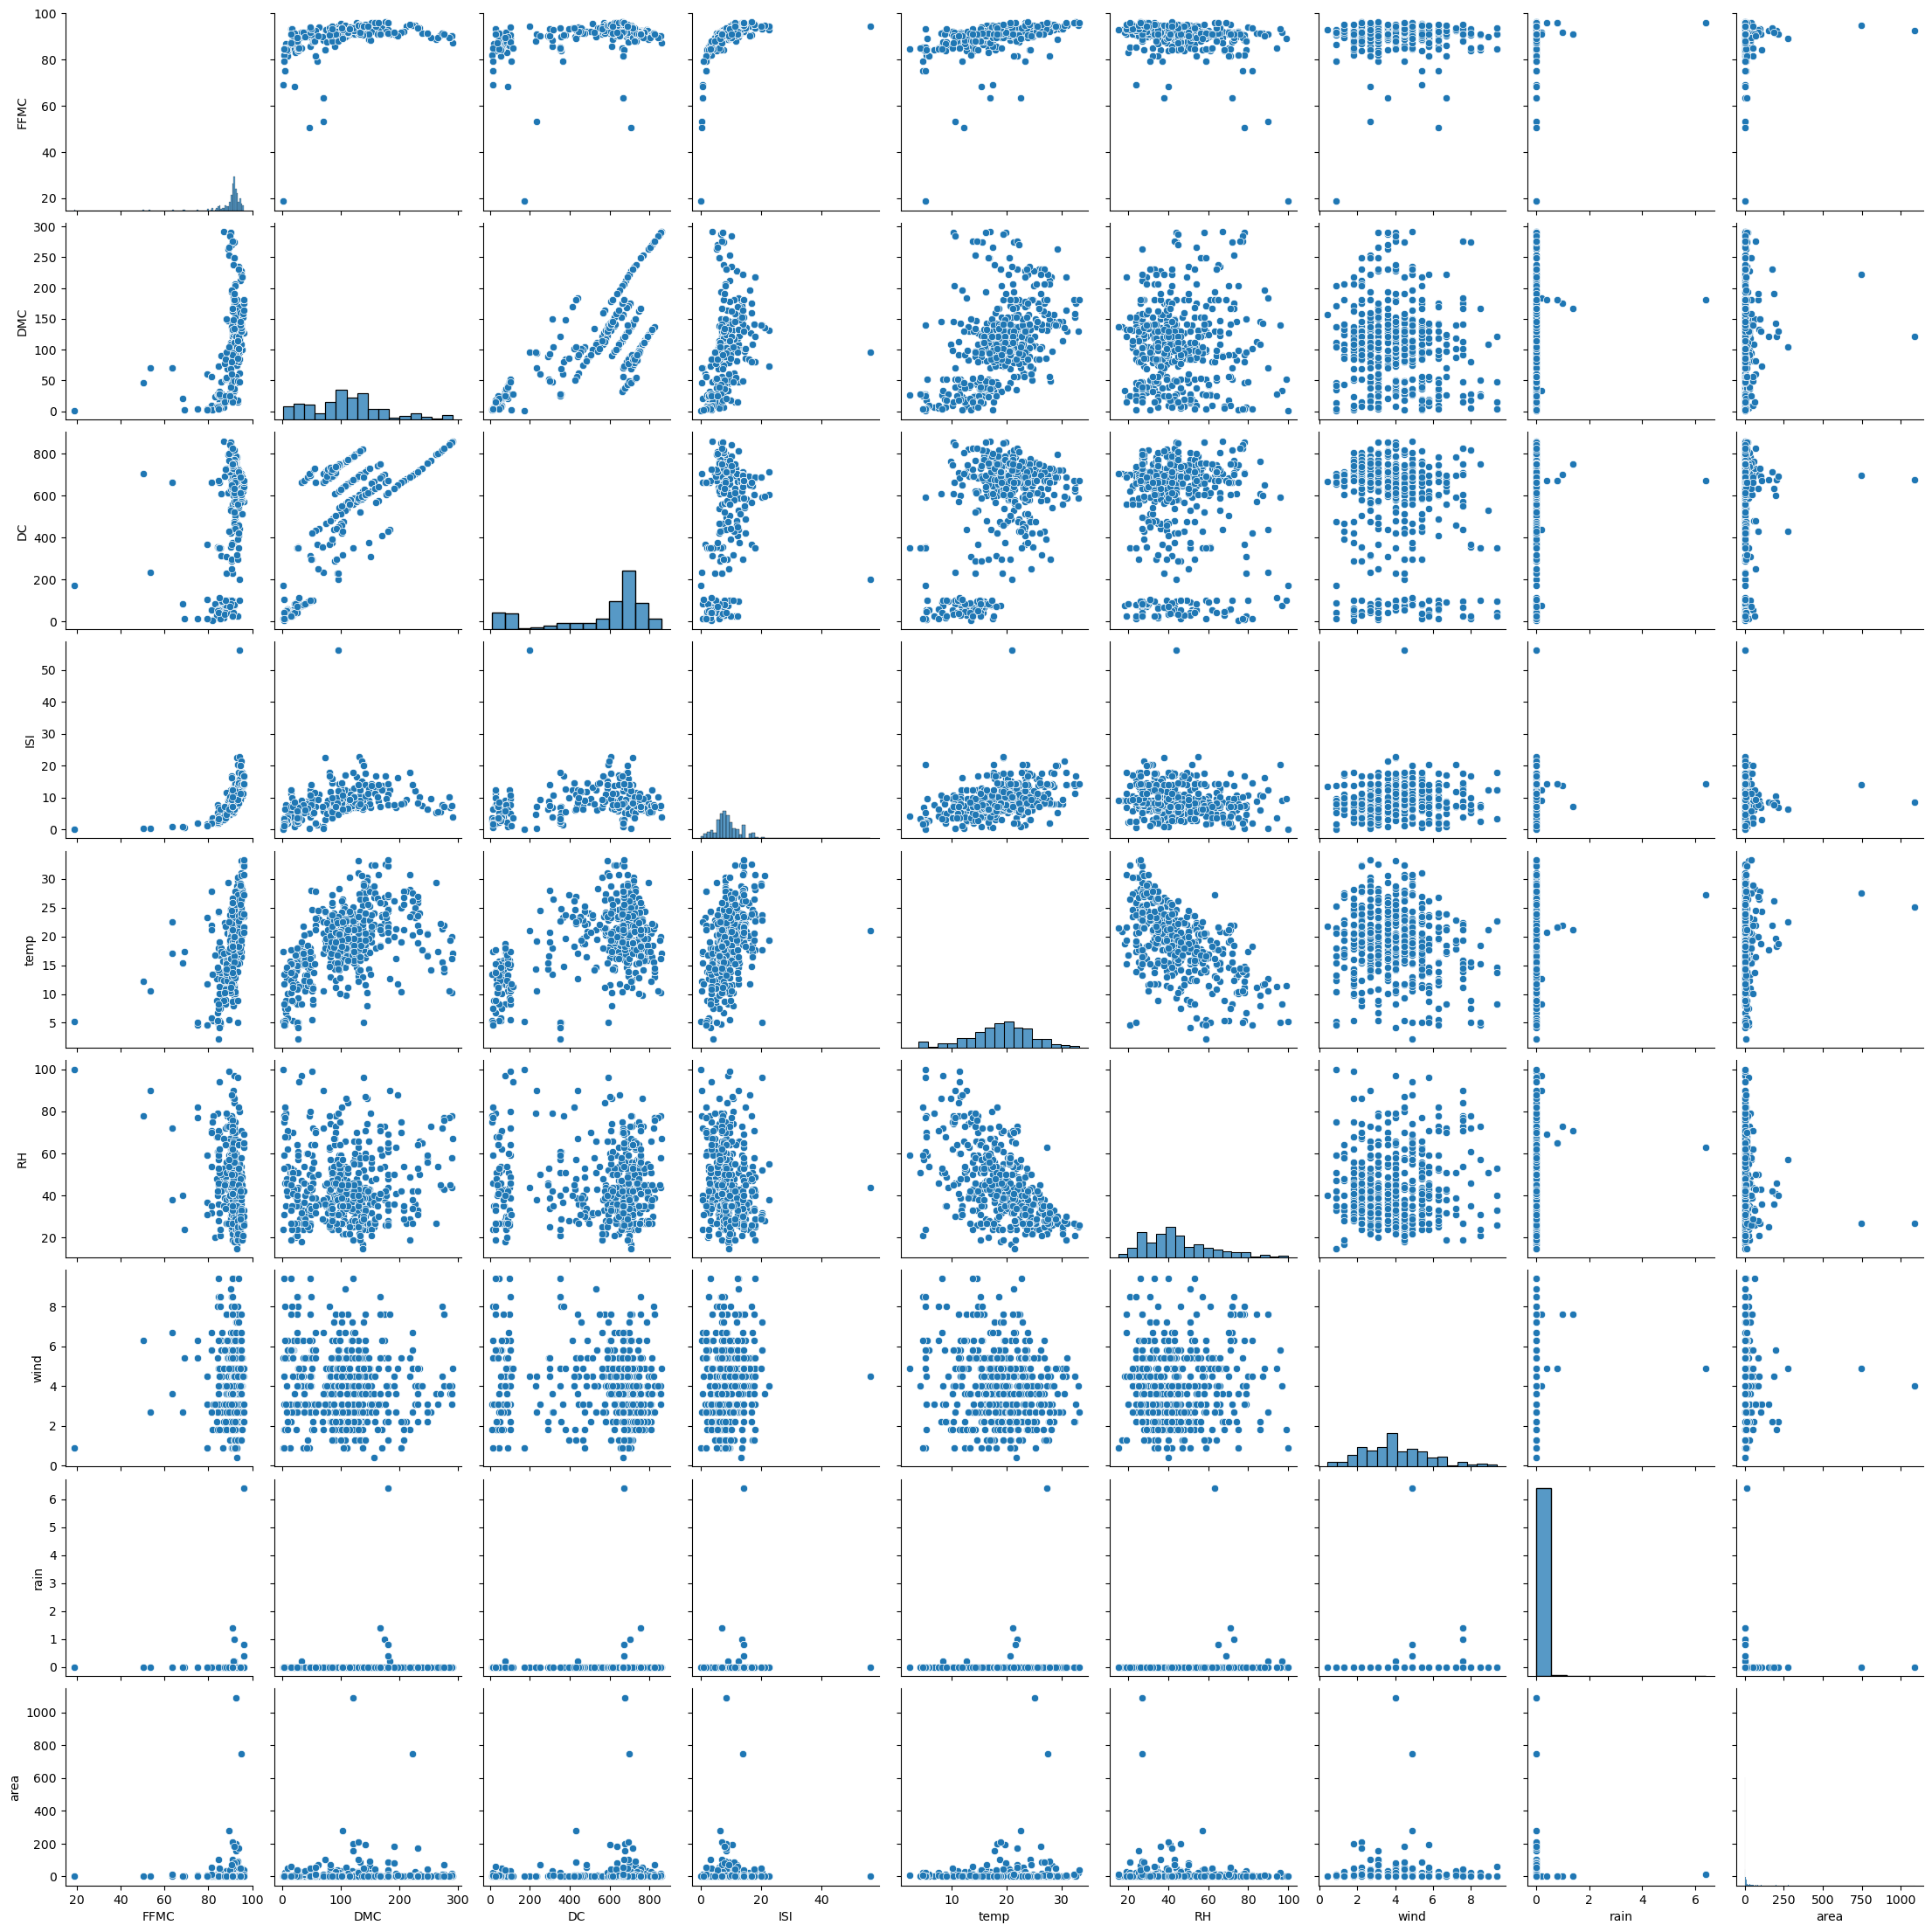

In [6]:
sns.pairplot(df.iloc[:,4:])

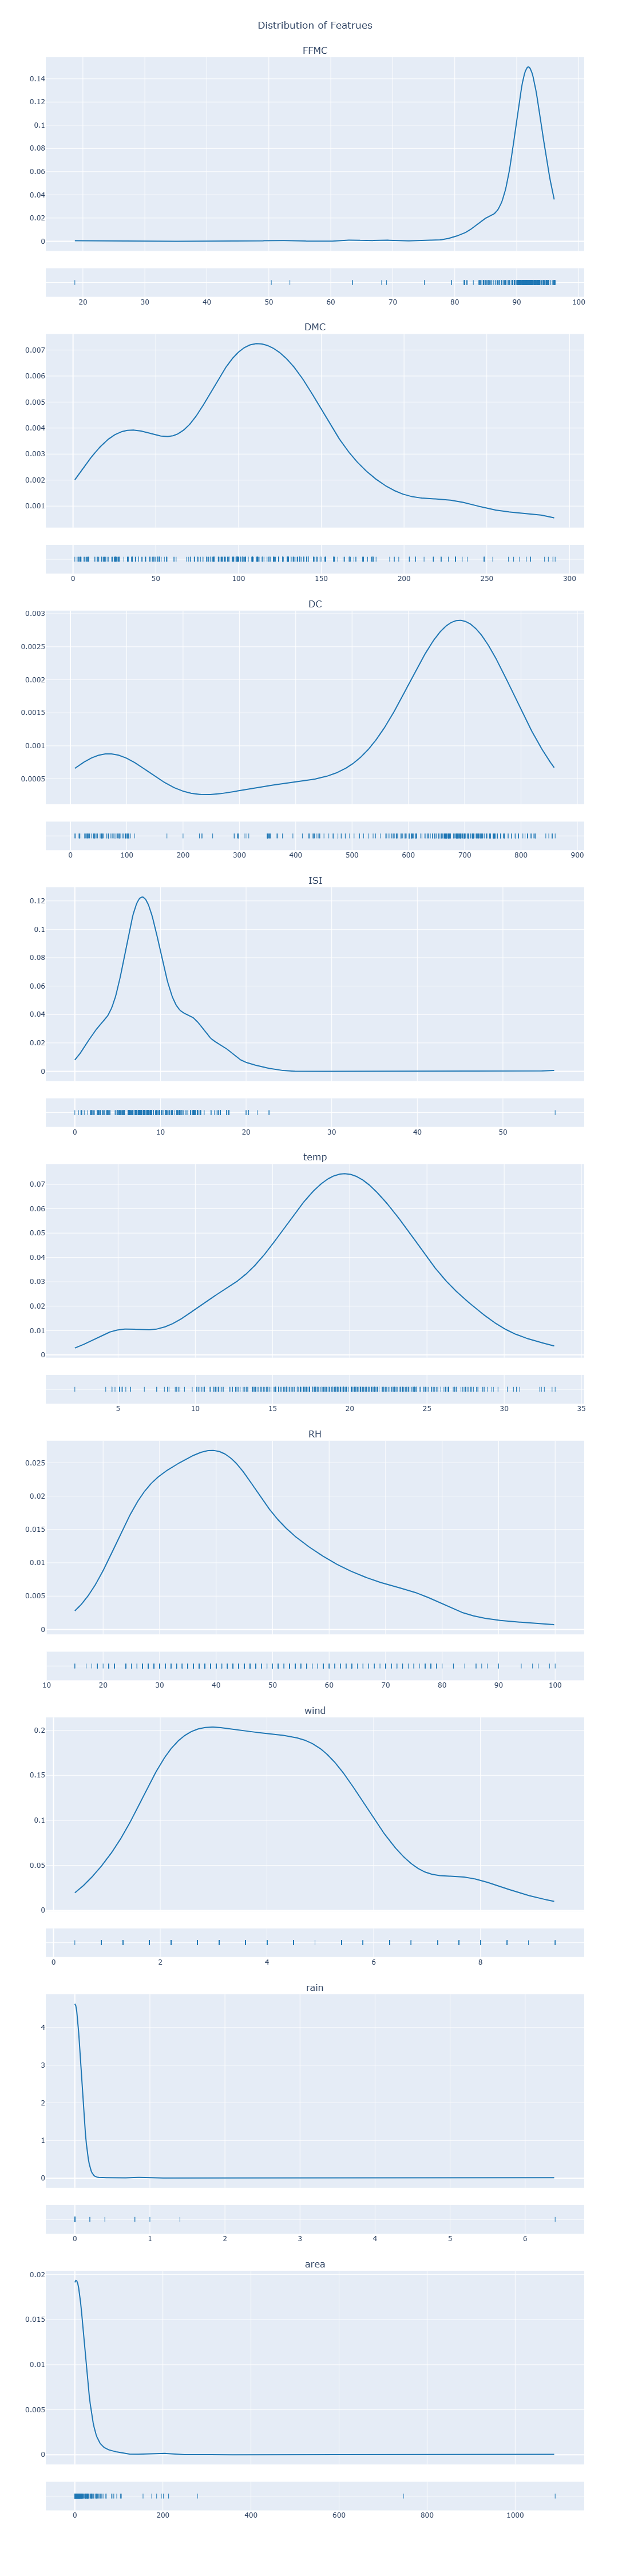

In [7]:
cols = df.columns[4:13]
ncol = len(cols)

fig = make_subplots(rows=ncol*2, cols=1,
                    row_heights=ncol*[0.8,0.2],
                    subplot_titles=[cols[int(i/2)] if i%2==0 else '' for i in range(ncol*2)],
                    vertical_spacing=0.007,
                    specs=ncol*[[{}],[{'b':0.008}]]
                   )

for col in range(ncol):
    fig.append_trace(ff.create_distplot([df[cols[col]]],group_labels=[cols[col]],show_hist=False)['data'][0],row=col*2+1,col=1)
    fig.append_trace(ff.create_distplot([df[cols[col]]],group_labels=[cols[col]],show_hist=False)['data'][1],row=col*2+1,col=1)
    fig.update_xaxes(showticklabels=False,row=col*2+1,col=1)
    fig.append_trace(ff.create_distplot([df[cols[col]]],group_labels=[cols[col]],show_hist=False)['data'][1],row=col*2+2,col=1)
    fig.update_yaxes(showticklabels=False,row=col*2+2,col=1)

fig.update_layout(showlegend=False,height=ncol*500,title='Distribution of Featrues',title_x=0.5)

In [8]:
mnt_mean = df.groupby(by=['month']).mean(numeric_only=True)[cols]

In [9]:
month_names = list(map(str.lower,list(calendar.month_abbr)[1:]))
mnt_mean = mnt_mean.loc[month_names,]

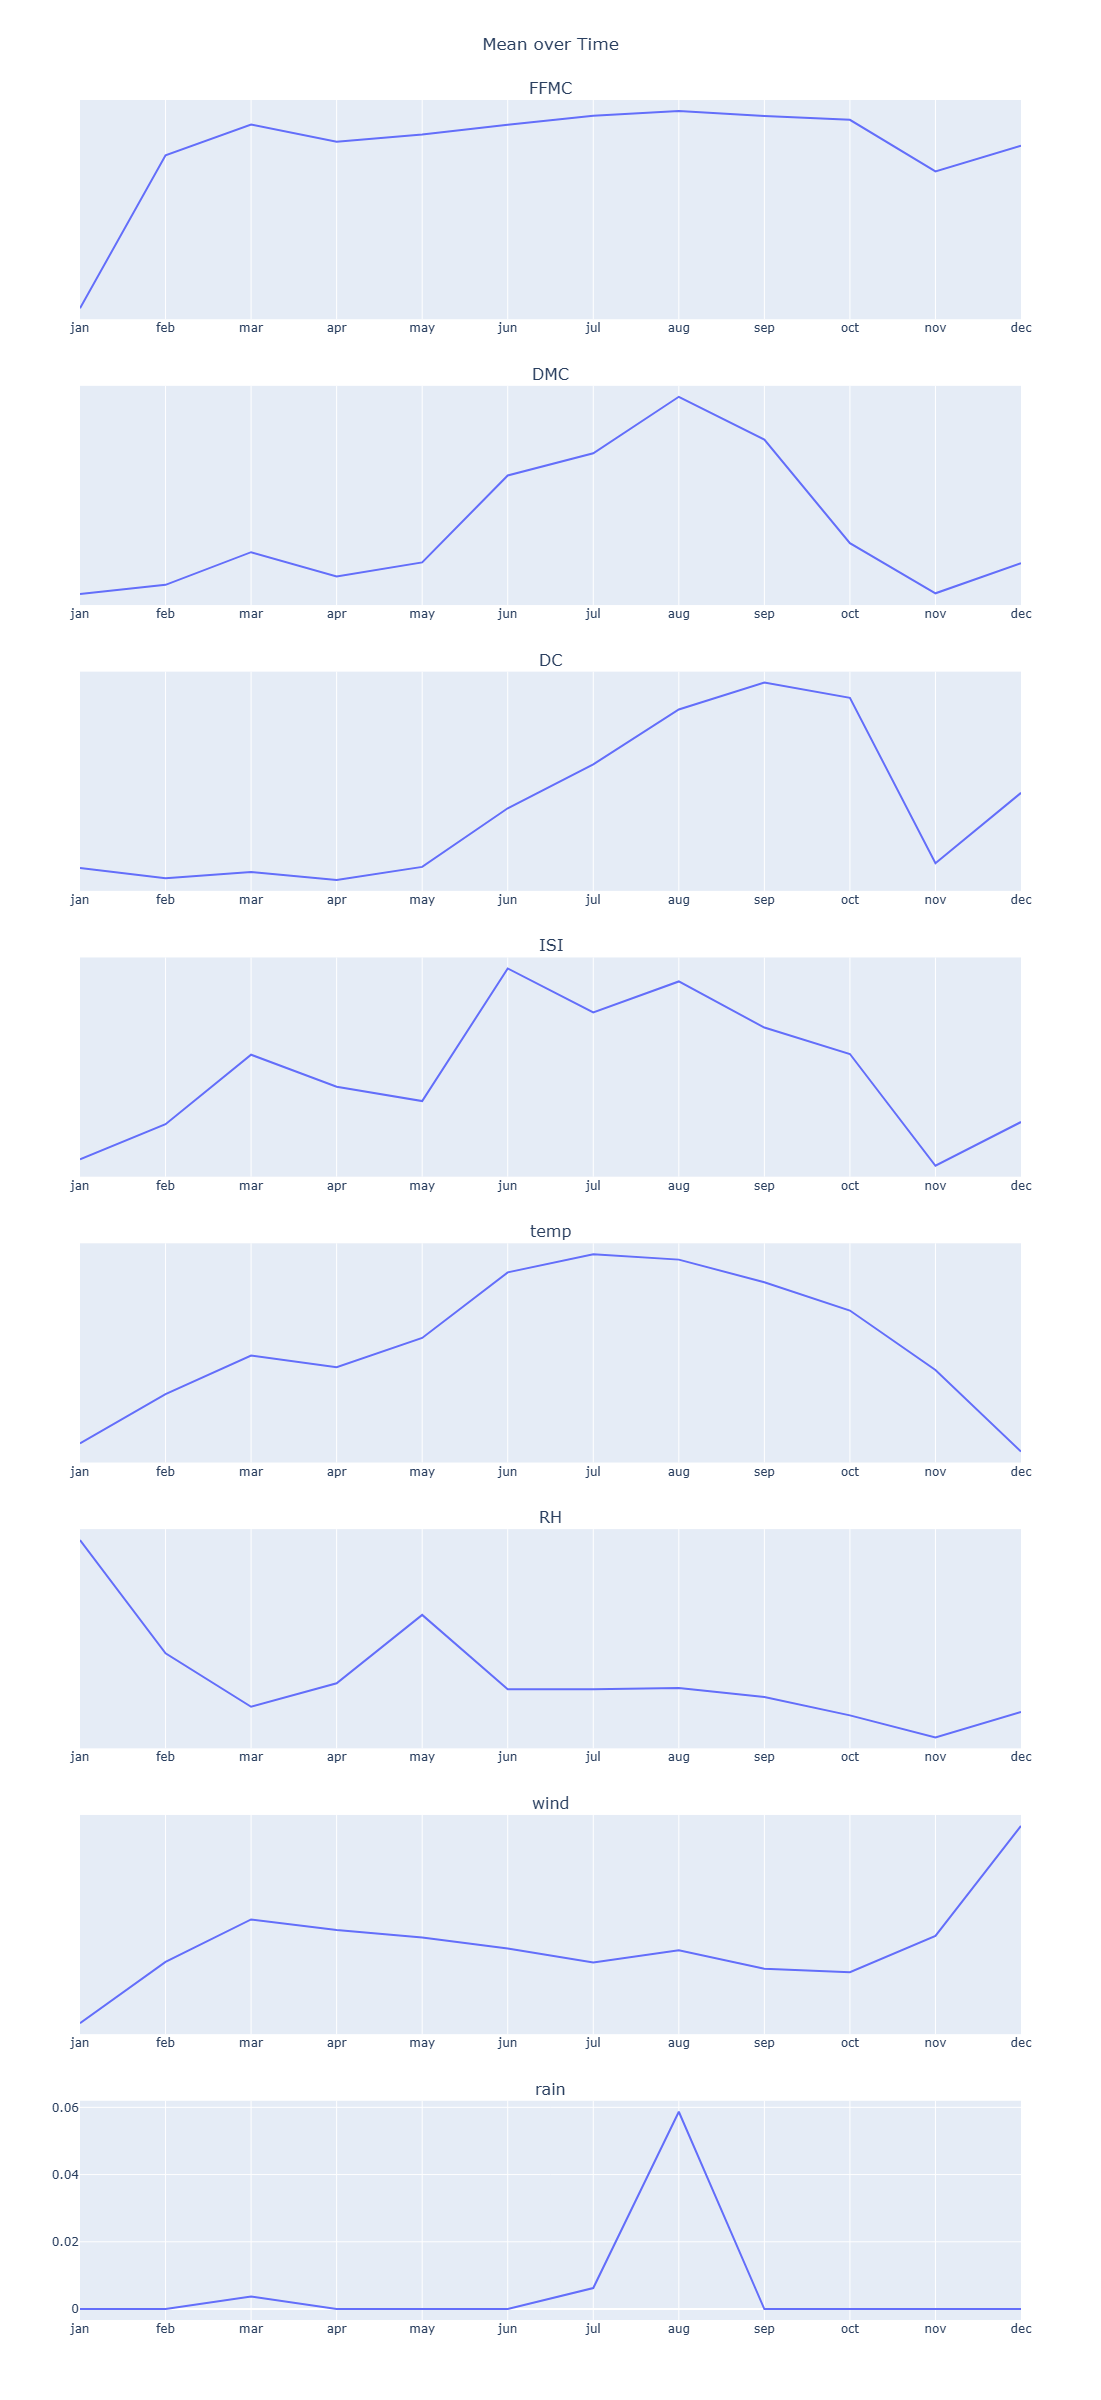

In [10]:
cols = df.columns[4:12]
ncol = len(cols)

fig = make_subplots(rows=ncol, cols=1,
                    subplot_titles=cols,
                    vertical_spacing=0.03,
                   )

for col in range(ncol):
    fig.append_trace(px.line(mnt_mean,x=mnt_mean.index,y=cols[col])['data'][0],row=col+1,col=1)
    fig.update_yaxes(visible=False,row=col,col=1)
fig.update_layout(showlegend=False,height=ncol*300,title='Mean over Time',title_x=.5)
                     

In [11]:
month_area_sum = df[['month','area']].groupby('month').sum().loc[map(str.lower,calendar.month_abbr[1:]),:].reset_index()

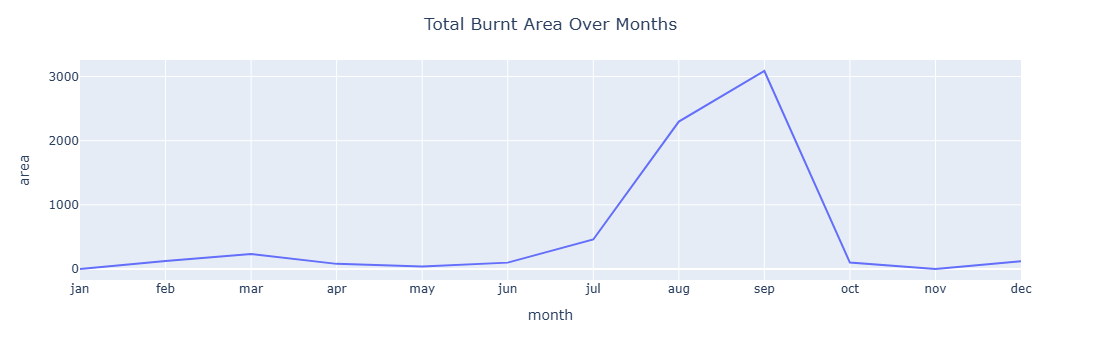

In [12]:
fig = px.line(month_area_sum,x='month',y='area')
fig.update_layout(title='Total Burnt Area Over Months',title_x=.5)

**Between July to August we can see the most forest fires. It is mainly due to high temperatrue, low relative humidity. Though we can see the most rainfall in august the amount of rainfall is not enough to prevent forest fire.** 

**`temp`, `RH`,`wind`, `rain` features are measured from direct physical phenomenon. Thus relation between these features gives valueable insight.**

In [15]:
month_dict = {month:index+1 for index,month in enumerate(list(map(str.lower,list(calendar.month_abbr)[1:])))}
df['month_num'] = df.month.map(month_dict)

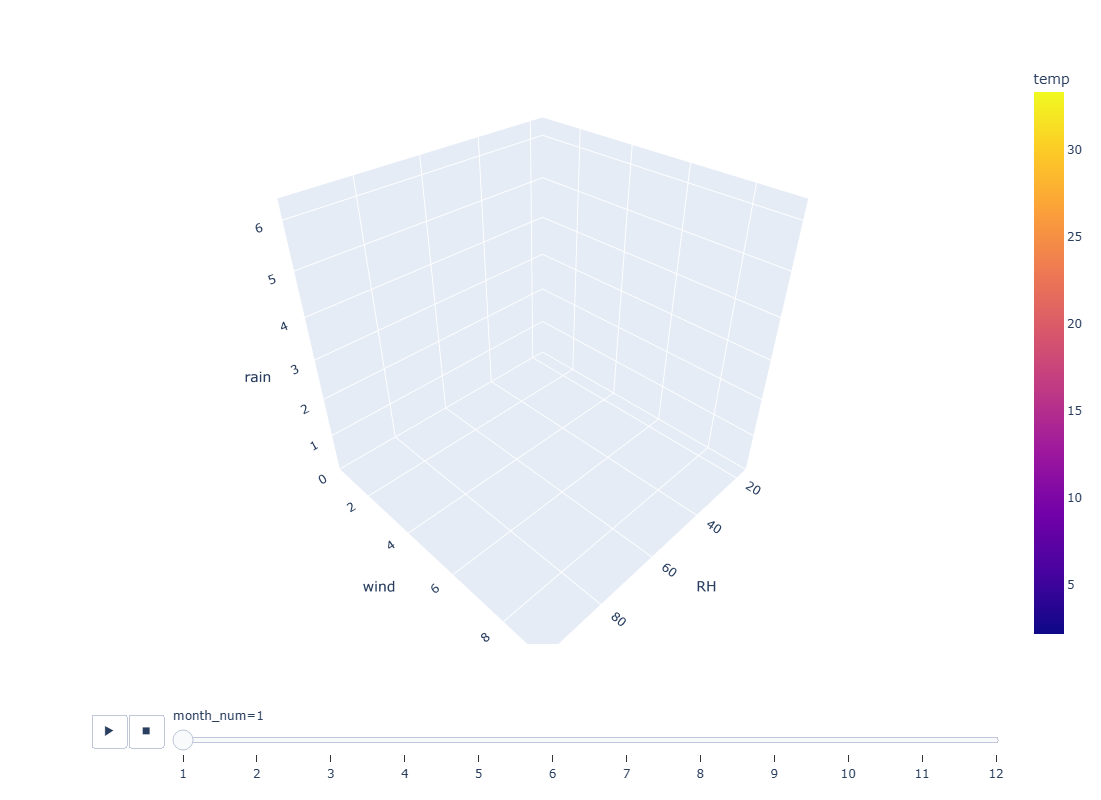

In [16]:
x, y, z, color, size = 'RH','wind','rain','temp','area'


fig = px.scatter_3d(
    df.sort_values(by='month_num'),
    x=x,
    y=y,
    z=z,
    color=color,
    size=size,
    animation_frame='month_num',
    size_max=100)

frames = []
for frame in fig.frames:
    # Get the first title for this frame (all same within frame)
    frame_title = df[df['month_num'] == int(frame.name)]['month'].iloc[0]
    new_frame = go.Frame(
        data=frame.data,
        name=frame.name,
        layout=go.Layout(title=f'<b>{frame_title}</b>')
    )
    frames.append(new_frame)

fig.frames = frames

fig.update_layout(
    height=800,
    width=800,
    title_x=0.5,
    scene=dict(
        xaxis=dict(
            range=[df[x].min(), df[x].max()],
            nticks=round((df[x].max()-df[x].min())/10),
        ),  
        yaxis=dict(
            range=[df[y].min(), df[y].max()],
            nticks=round((df[y].max()-df[y].min())/2 +1)
        ),  
        zaxis=dict(
            range=[df[z].min(), df[z].max()],
            nticks=round(df[z].max()-df[z].min()+1)
        )   
    ),
    coloraxis=dict(cmin=df[color].min(), cmax=df[color].max())
)
fig.show()

 **`FFMC`, `DMC`, `DC`, `ISI` are calculated from FWI system.**

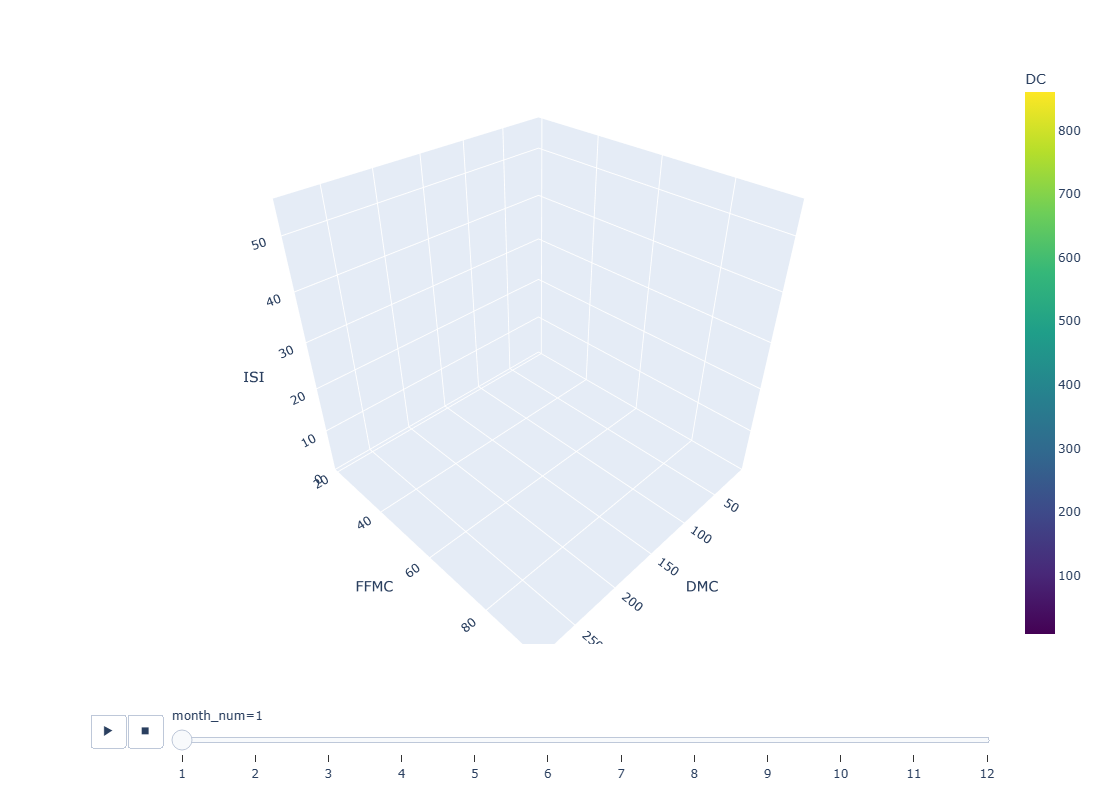

In [18]:
x, y, z, color, size =  'DMC','FFMC','ISI', 'DC','area'


fig = px.scatter_3d(
    df.sort_values(by='month_num'),
    x=x,
    y=y,
    z=z,
    color=color,
    size=size,
    animation_frame='month_num',
    size_max=100,
    color_continuous_scale='Viridis'
)

frames = []
for frame in fig.frames:
    # Get the first title for this frame (all same within frame)
    frame_title = df[df['month_num'] == int(frame.name)]['month'].iloc[0]
    new_frame = go.Frame(
        data=frame.data,
        name=frame.name,
        layout=go.Layout(title=f'<b>{frame_title}</b>')
    )
    frames.append(new_frame)
fig.frames = frames


fig.update_layout(
    height=800,
    width=800,
    title_x=0.5,
    scene=dict(
        xaxis=dict(
            range=[df[x].min(), df[x].max()],
            nticks=6,
        ),
        yaxis=dict(
            range=[df[y].min(), df[y].max()],
            nticks=6
        ),
        zaxis=dict(
            range=[df[z].min(), df[z].max()],
            nticks=6
        ),
        aspectmode='manual',
        aspectratio=dict(
            x=1,
            y=1,
            z=1
        ),
    ),   
    coloraxis=dict(cmin=df[color].min(), cmax=df[color].max()),
)

fig.show()

In [19]:
z = data = df.groupby(['X','Y'])['area'].sum().unstack().fillna(0)
z[1] = np.zeros((9,1))
z[7] = np.zeros((9,1))
z = z[z.columns.sort_values()]

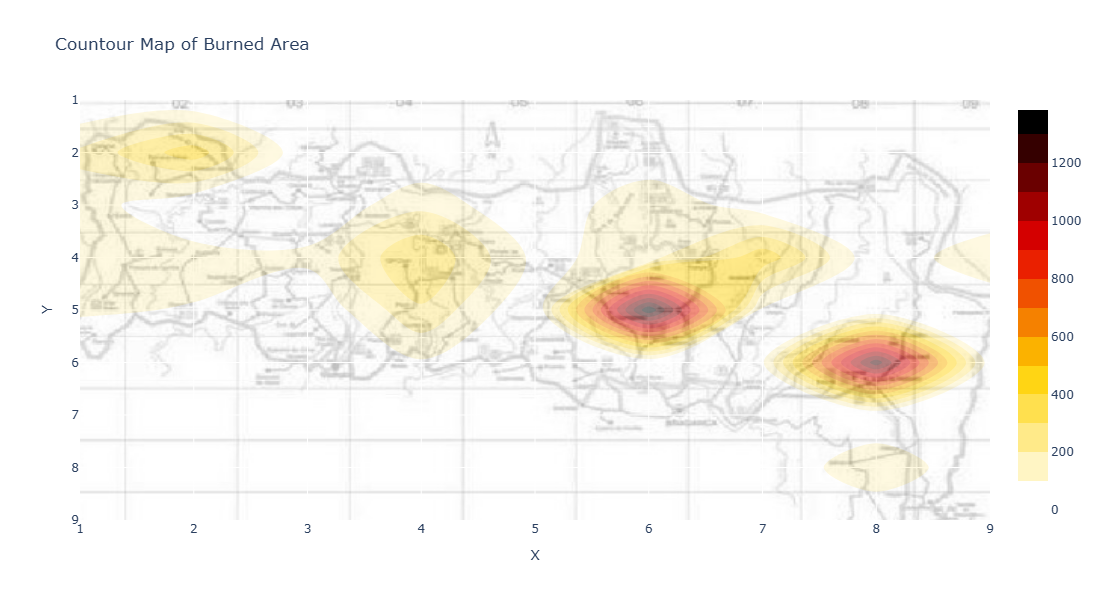

In [50]:
fig = go.Figure(
    data=go.Contour(
        z=z.T,
        x=z.index,
        y=z.columns,
        opacity=0.5,
        line=dict(width=0),
        colorscale='Hot_r'

    )
)
fig.update_layout(
    height=600,
    width=1000,
    xaxis=dict(
        tickmode='linear',
        tick0=1,
        dtick=1
    ),
    title='Countour Map of Burned Area'
               
)
fig.update_xaxes(range=[1,9],title='X')
fig.update_yaxes(range=[9,1],title='Y')

fig.add_layout_image(
        dict(
            source=Image.open("The-map-of-the-Montesinho-natural-park_W640.png"),
            xref="x",
            yref="y",
            x=0.5,
            y=9.2,
            sizex=8.5,
            sizey=8.7,
            sizing="stretch",
            layer="below",
            xanchor='left',
            yanchor='bottom'
        )
)